## Ejemplo 03: Clasificador por Redes Neuronales
En este ejemplo vamos a generar un clasificador por redes neuronales con Scikit Learn. para ello, vamos a dividir nuestros datos en entrenamiento y prueba, y solamente le suministraremos datos de entrenamiento a nuestro modelo

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

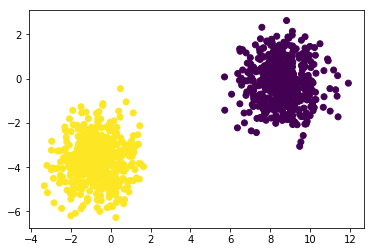

In [2]:
x, y = make_blobs(n_samples=1000, centers=2, n_features=2)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

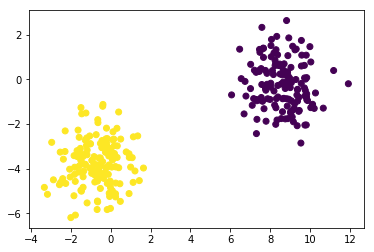

In [3]:
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(x, y, test_size=0.30)
plt.scatter(x_prueba[:,0], x_prueba[:,1], c=y_prueba)

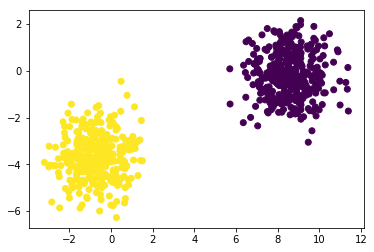

In [4]:
plt.scatter(x_entrenamiento[:,0], x_entrenamiento[:,1], c=y_entrenamiento)

## Entrenamiento de redes neuronales.
aquí creamos una red neuronal de 4 neuronas en la primera capa, y 1 neurona que arrojará 0 o 1 en la segunda capa. El algoritmo de entrenamiento será ADAM, y tendrá una tasa de aprendizaje de $1 \times 10^{-4}$

In [5]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(activation = 'logistic',solver='adam', alpha=1e-4, max_iter=10000, hidden_layer_sizes=(4,1))
clf.fit(x_entrenamiento, y_entrenamiento)  

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 1), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Como podemos ver, la red neuronal tuvo un excelente desempeño! el desempeño puede variar si corres el experimento diferentes veces (por aquello de la aleatoriedad) sin embargo será bastante elevado.

In [6]:
resultados = clf.predict(x_prueba)
errores = np.sum(np.abs(resultados - y_prueba))
accuracy = (len(y_prueba)-errores)/len(y_prueba) *100
print("Errores cometidos: "+str(errores))
print("Precisión: "+str(accuracy)+"%")

Errores cometidos: 0
Precisión: 100.0%
